In [2]:
#홈페이지를 로컬에 파일로 저장

import urllib
request= urllib.request.Request('https://www.naver.com')
data= urllib.request.urlopen(request).read()
f= open('pc.html', 'wb')
f.write(data)
f.close()


<!doctype html>                          <html lang="ko" data-dark="false"> <head> <meta charset="utf-8"> <title>NAVER</title> <meta http-equiv="X-UA-Compatible" content="IE=edge"> <meta name="viewport" content="width=1190"> <meta name="apple-mobile-web-app-title" content="NAVER"/> <meta name="robots" content="index,nofollow"/> <meta name="description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta property="og:title" content="네이버"> <meta property="og:url" content="https://www.naver.com/"> <meta property="og:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta property="og:description" content="네이버 메인에서 다양한 정보와 유용한 컨텐츠를 만나 보세요"/> <meta name="twitter:card" content="summary"> <meta name="twitter:title" content=""> <meta name="twitter:url" content="https://www.naver.com/"> <meta name="twitter:image" content="https://s.pstatic.net/static/www/mobile/edit/2016/0705/mobile_212852414260.png"> <meta name="twitter:description" content="네이버 메
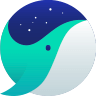
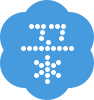

In [5]:
with open('pc.html','rb')as f:
    data=f.read().decode('utf-8')
    print(data)

In [6]:
# decode를 하는 기준.. ? 

In [7]:
!conda list

# packages in environment at C:\Users\admin\anaconda3\envs\cakd3:
#
# Name                    Version                   Build  Channel
_tflow_select             2.3.0                     eigen  
absl-py                   0.12.0           py38haa95532_0  
aiohttp                   3.7.4            py38h2bbff1b_1  
argon2-cffi               20.1.0           py38h2bbff1b_1  
astor                     0.8.1            py38haa95532_0  
astunparse                1.6.3                      py_0  
async-timeout             3.0.1            py38haa95532_0  
async_generator           1.10               pyhd3eb1b0_0  
attrs                     21.2.0             pyhd3eb1b0_0  
autobahn                  21.2.1             pyhd8ed1ab_0    vpython
backcall                  0.2.0              pyhd3eb1b0_0  
blas                      1.0                         mkl  
bleach                    3.3.0              pyhd3eb1b0_0  
blinker                   1.4              py38haa95532_0  
brotlipy        

In [8]:
!pip install bs4

  Created wheel for bs4: filename=bs4-0.0.1-py3-none-any.whl size=1273 sha256=3b20a72fb9d6fa86e90da6a7cc98287f48cca35ad290ef44a7395533d76617dc
  Stored in directory: c:\users\admin\appdata\local\pip\cache\wheels\75\78\21\68b124549c9bdc94f822c02fb9aa3578a669843f9767776bca
Successfully built bs4


BeautifulSoup 모듈
- 홈페이지 내 데이터를 쉽게 추출할 수 있게 해주는 파이썬 외부 라이브러리
- 웹 문서 내 수많은 HTML 태그들을 parser를 활용해 사용하기 편한 파이썬 객체로 만들어 제공
- 웹문서 구조를 알고 있다면 편하게 데이터를 뽑아 활용할 수 있음


In [19]:
from bs4 import BeautifulSoup
html="""
<html>
<head>
</head>
<body>
    <h1>스크래핑이란?</h1>
    <p>웹 페이지를 분석하는 것</p>
    <p>원하는 부분을 추출하는 것</p>
</body>
</html>
"""

soup= BeautifulSoup(html,'html.parser') 
print(soup)
h1= soup.body.h1
print(h1)
print(h1.string)
print(h1.text)


<html>
<head>
</head>
<body>
<h1>스크래핑이란?</h1>
<p>웹 페이지를 분석하는 것</p>
<p>원하는 부분을 추출하는 것</p>
</body>
</html>

<h1>스크래핑이란?</h1>
스크래핑이란?
스크래핑이란?


In [26]:
p1= soup.body.p
print(p1)
print(p1.string)
print(p1.text)

p2= p1.next_sibling.next_sibling     #두번째 p추출 
print(p2)
print(p2.string)

<p>웹 페이지를 분석하는 것</p>
웹 페이지를 분석하는 것
웹 페이지를 분석하는 것
<p>원하는 부분을 추출하는 것</p>
원하는 부분을 추출하는 것


find(): HTML 태그에 대한 첫 번째 정보를 가져옴
- find(속성=값): HTML 해당 속성과 일치하는 값에 대한 첫 번쨰 정보를 가져옴

In [30]:
#id로 요소를 찾는 방법
from bs4 import BeautifulSoup
html="""
<body>
    <h1 id='title'>스크래핑이란?</h1>
    <p id='body'>웹 페이지를 분석하는 것</p>
    <p>원하는 부분을 추출하는 것</p>
</body>
"""

soup= BeautifulSoup(html,'html.parser')
title= soup.find(id='title')
body= soup.find(id='body')

print(title.string)
print(body.string)

스크래핑이란?
웹 페이지를 분석하는 것


HTML 태그 정리 :https://pridiot.tistory.com/6

In [33]:
# 여러개의 요소 추출
from bs4 import BeautifulSoup
html= """
<html><body>
    <ul>
        <li><a href="http://www.naver.com">naver</a></li>
        <li><a href="http://www.daum.net">daum</a></li>
    </ul>
</body></html>
"""

soup=BeautifulSoup(html,'html.parser')
links= soup.find_all('a')
for a in links:
    href= a.attrs['href']
    text= a.string
    print(text, ">", href)

naver > http://www.naver.com
daum > http://www.daum.net


In [ ]:
find('title')
find('wf')

In [35]:
import urllib
import requests
from bs4 import BeautifulSoup

URL='http://www.weather.go.kr/weather/forecast/mid-term-rss3.jsp'

data = requests.get(URL).text
print(data)

a= data.decode('utf-8')
soup= BeautifulSoup()

<?xml version="1.0" encoding="utf-8" ?>
<rss version="2.0">
<channel>
<title>기상청 육상 중기예보</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<description>기상청 날씨 웹서비스</description>
<language>ko</language>
<generator>기상청</generator>
<pubDate>2021년 07월 06일 (화)요일 06:00</pubDate>
 <item>
<author>기상청</author>
<category>육상중기예보</category>
<title>전국 육상 중기예보 - 2021년 07월 06일 (화)요일 06:00 발표</title>
<link>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</link>
<guid>http://www.kma.go.kr/weather/forecast/mid-term_01.jsp</guid>
<description>
	<header>
		<title>전국 육상중기예보</title>
		<tm>202107060600</tm>
		<wf><![CDATA[○ (강수) 9일(금)은 전국에 비가 오겠고, 제주도는 11일(일)까지 이어지겠습니다. <br />          10일(토)~11일(일) 오후에 전국(강원영동 제외)에 비가 오겠고, 12일(월) 오후에 수도권과 강원영서, 충청권에, 13일(화) 오전 수도권과 강원영서에 비가 오겠습니다.<br />○ (기온) 이번 예보기간 아침 기온은 21~25도, 낮 기온은 27~33도로 어제(5일, 아침최저기온 19~23도, 낮최고기온 23~30도)보다 높겠습니다.<br />○ (주말전망) 10일(토)~11일(일)은 전국이 구름많고 오후에 비가 오겠습니다. 아침 기온은 21~24도, 낮 기온은 27~32도가 되겠습니다.<br /> <br />* 9일까지

In [37]:
import urllib
from bs4 import BeautifulSoup as bs

URL = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'

response = urllib.request.Request(URL)
text = urllib.request.urlopen(response).read()
soup = bs(text,'html.parser')

title = soup.find('title')
wf = soup.find('wf')

print(title.string)
print(wf.string)


기상청 육상 중기예보
○ (강수) 9일(금)은 전국에 비가 오겠고, 제주도는 11일(일)까지 이어지겠습니다. <br />          10일(토)~11일(일) 오후에 전국(강원영동 제외)에 비가 오겠고, 12일(월) 오후에 수도권과 강원영서, 충청권에, 13일(화) 오전 수도권과 강원영서에 비가 오겠습니다.<br />○ (기온) 이번 예보기간 아침 기온은 21~25도, 낮 기온은 27~33도로 어제(5일, 아침최저기온 19~23도, 낮최고기온 23~30도)보다 높겠습니다.<br />○ (주말전망) 10일(토)~11일(일)은 전국이 구름많고 오후에 비가 오겠습니다. 아침 기온은 21~24도, 낮 기온은 27~32도가 되겠습니다.<br /> <br />* 9일까지 오랜기간 비가 이어지면서 지반이 약해져 축대붕괴, 산사태 등의 피해가 우려되니, 사전에 철저히 대비하기 바랍니다.<br />* 이번 예보기간 동안 북태평양고기압의 확장 정도와 정체전선의 위치에 따라 강수 변동성이 크겠으니, 앞으로 발표되는 기상정보를 참고하기 바랍니다.


In [ ]:
#썜
# import urllib.request as req
# from bs4 import BeautifulSoup as bs

# URL = 'http://www.kma.go.kr/weather/forecast/mid-term-rss3.jsp'

# res= urllib.request.Request(URL)
# text = urllib.request.urlopen(response).read()
# soup = bs(text,'html.parser')

# title = soup.find('title')
# wf = soup.find('wf')

# print(title.string)
# print(wf.string)


find_all(): 
- HTML의 해당 태그에 대한 모든 정보를 리스트 형식으로 가져옴.(limit옵션으로 개수 지정 가능)
- CSS 속성으로 필터링(class_(생략가능)로 클래스를 직접 사용. 혹은 attrs에서 속성=값으로 필터링

[<a class="link_set" data-clk="top.mkhome" href="https://help.naver.com/support/welcomePage/guide.help" id="NM_set_home_btn">네이버를 시작페이지로</a>]
[<a class="_2aeXMlrb" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #7c56d5">다운로드</span></a>]
------------------------------------------------------
[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>, <a href="#themecast"><span>주제별캐스트 바로가기</span></a>, <a href="#timesquare"><span>타임스퀘어 바로가기</span></a>, <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a>, <a href="#account"><span>로그인 바로가기</span></a>, <a class="_3h-N8T9V" data-clk="dropbanner1a" href="https://whale.naver.com/banner/details/darkmode?=main&amp;wpid=RydDy7"></a>, <a class="_2aeXMlrb" data-clk="dropdownload1a" href="https://installer-whale.pstatic.net/downloads/banner/RydDy7/WhaleSetup.exe" id="NM_whale_download_btn"><span style="background-color: #7c56d5">다운로드</span></a>, 
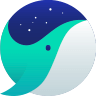
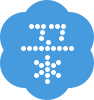

In [43]:
import requests
from bs4 import BeautifulSoup
req= requests.get('https://www.naver.com')
html= req.text
#print(html)
soup= BeautifulSoup(html,'html.parser')
result= soup.find_all('a',class_='link_set')
print(result)

result0= soup.find_all('a',class_='_2aeXMlrb')
print(result0)

print('------------------------------------------------------')
result1= soup.find_all('a')
print(result1)

In [49]:
print(soup.title)
print(soup.title.name)
print(soup.title.string)
print(soup.img)
print(soup.img['alt'])

print(soup.a)
print(soup.a['href'])
print(soup.a.string)
#alt는 이미지 속성

<title>NAVER</title>
title
NAVER
<img alt="" height="49" src="https://static-whale.pstatic.net/main/img_darkmode@2x.png" style="padding-left: 48px" width="303"/>

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>
#newsstand
뉴스스탠드 바로가기


In [50]:
print (soup.find_all('a',limit=2))

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>, <a href="#themecast"><span>주제별캐스트 바로가기</span></a>]


In [52]:
print(soup.find_all('a')[1])   #인덱스

<a href="#themecast"><span>주제별캐스트 바로가기</span></a>


In [54]:
print(soup.find_all('div',id='u_skip'))

[<div id="u_skip"> <a href="#newsstand"><span>뉴스스탠드 바로가기</span></a> <a href="#themecast"><span>주제별캐스트 바로가기</span></a> <a href="#timesquare"><span>타임스퀘어 바로가기</span></a> <a href="#shopcast"><span>쇼핑캐스트 바로가기</span></a> <a href="#account"><span>로그인 바로가기</span></a> </div>]


In [58]:
print(soup.find_all('span', class_='blind',limit=2))


[<span class="blind">NAVER whale</span>, <span class="blind">네이버</span>]


In [59]:
print(soup.find_all('span', attrs={'class':'blind'},limit=2))

[<span class="blind">NAVER whale</span>, <span class="blind">네이버</span>]


In [61]:
print(soup.find_all('span', attrs={'class':'blind','class':'item'}))

[<span class="item">추첨 @13@.</span>, <span class="item">지급기한 1년</span>, <span class="item"><i class="imsc ico_arr"></i>@8@(@9@%)</span>, <span class="item">@7@, @message@</span>, <span class="item">@5@</span>]


In [64]:
import re
print(soup.find_all(string='네이버'))
print(soup.find_all(string=re.compile('네이버')))

['네이버']
['네이버', '네이버를 시작페이지로', '쥬니어네이버', '네이버뉴스', '언론사가 직접 편집한 뉴스들을 네이버 홈에서 바로 보실 수 있습니다.', "이베이 인수전 흥행 와중에 요기요 입찰 두 차례 연기…'경쟁사' 배민에 자금 제공하는 꼴[비즈한국] 신세계·롯데 등 쟁쟁한 대기업이 이베이코리아 인수전에 참여한 끝에 6월 24일 3조 4404억 원을 써낸 신세계그룹이 인수자로 정해졌다. 이로써 국내 이커머스 업계 판도가 네이버·신세계·쿠팡 중심으로 재편되고", '트래픽 50% 사용하는 해외 CP는 소액 혹은 무대가로 망 사용 1% 인 네이버는 연간 700억원의 망 사용료 지불 중[월드투데이 전유진 기자] 넷플릭스와 SK브로드밴드의 ‘망 사용료’ 갈등이 뜨겁다. ◆ 급성장한 넷플릭스편하게 집에서 영화, 드라마를 볼 수 있어 많은 사랑을 받은 세계 최대 인터넷 동영상 서비스(OTT)', '안녕하세요 여러분! 다시 돌아온 디지털마케팅 기초 편 포스팅입니다. 이번 주제는 ‘네이버’를 검색엔진으로 사용하는 우리에게는 조금 멀게 느껴질 수도 있지만, 너무너무 중요하고 핫한 SEO (검색엔진최적화)! 오늘 포스팅의 목표는 SEO의 목적, 구성 요소, 최적화 방법 등에 대해 이해하기 쉽게 설명해드리는 것. 세부사항보', "네이버 '개인정보 처리방침' 변경에 대한 안내 말씀드립니다.", '네이버 개발자 센터', '네이버 D2', '네이버 D2SF', '네이버 랩스', '네이버 정책 및 약관', '네이버 정책']


seldect_one(), select()
- CEE 선택자를 활용하여 원하는 정보를 가져옴(태그를 검색하는 find,find_all과 비슷함)
- class는 .으로 Id는 # 로 표시

In [6]:

from bs4 import BeautifulSoup
html="""
<html>
<body>
<div id="meigen">
    <h1>위키북스 도서</h1>
    <ul class="items">
        <li>유니티 게임 이펙트 입문</li>
        <li>스위프트로 시작하는 아이폰 앱 개발 교과서</li>
        <li>모던 웹사이트 디자인의 정석</li>
    </ul>
</div>
</body></html>
"""

soup= BeautifulSoup(html,'html.parser')

h1=soup.select_one('div#meigen > h1').string
print(h1)
print(h1)
li_list=soup.select('div#meigen >ul.items >li')
for li in li_list:
    print(li.string)

위키북스 도서
위키북스 도서
유니티 게임 이펙트 입문
스위프트로 시작하는 아이폰 앱 개발 교과서
모던 웹사이트 디자인의 정석


In [23]:
#네이버 환율 가져와서 출력하세요 (https://finance.naver.com/marketindex/)

from bs4 import BeautifulSoup
import urllib.request as req
#HTML 가져오기
url= 'https://finance.naver.com/marketindex/'
res=req.urlopen(url)

soup= BeautifulSoup(res,'html.parser')
a= soup.select_one('span.value')
print('usd/krw=',a.string)


usd/krw= 1,131.80


In [24]:
from bs4 import BeautifulSoup

fp= open('fruits-vegetables.html', encoding='utf-8')
soup= BeautifulSoup(fp,'html.parser')
soup


<html>
<body>
<div id="main-goods" role="page">
<h1>과일과 야채</h1>
<ul id="fr-list">
<li class="red green" data-lo="ko">사과</li>
<li class="purple" data-lo="us">포도</li>
<li class="yellow" data-lo="us">레몬</li>
<li class="yellow" data-lo="ko">오렌지</li>
</ul>
<ul id="ve-list">
<li class="white green" data-lo="ko">무</li>
<li class="red green" data-lo="us">파프리카</li>
<li class="black" data-lo="ko">가지</li>
<li class="black" data-lo="us">아보카도</li>
<li class="white" data-lo="cn">연근</li>
</ul>
</div>
</body>
</html>

In [27]:
print(soup.select_one('ul#fr-list > li.yellow').string)
print(soup.select_one('ul#fr-list > li[data-lo="ko"]').string)
print(soup.select_one('ul#ve-list > li:nth-of-type(1)').string)


레몬
사과
무


In [54]:
#서로 다른 방법으로 아보카도 5번 출력 
print(soup.select('ul#ve-list > li.black')[1].string)

print(soup.select("ul#ve-list > li[data-lo='us']")[1].string)

print(soup.select_one('ul#ve-list > li:nth-of-type(4)').string)

print(soup.find_all('li', attrs={'class':'black','data-lo':'us'})[0].string)

print(soup.find_all('li',class_='black')[1].string)

print(soup.find(attrs={'class':'black','data-lo':'us'}).string)


아보카도
아보카도
아보카도
아보카도
아보카도
아보카도


In [55]:
# Q. 정규표현식과 BeautifulSoup을 이용하여 https가 포함된 url만 출력하세요.
from bs4 import BeautifulSoup
import re #정규표현식을 사용할 때--- 
html= """
<ul>
    <li><a href='hode.html'>hoge</li>
    <li><a href='https://example.com/fuga'>fuga*</li>
    <li><a href='https://example.com/foo'>foo*</li>
    <li><a href='http://example.com/aaa'>aaa</li>
</ul>
"""

p= re.compile('^https')
soup= BeautifulSoup(html,'html.parser')
list_find= soup.find_all(href=re.compile('^https'))    # re.compile('^~~')  첫글자가 ~~ ///#re.compile('[^]') : not의 의미 
print(list_find)
for find in list_find:
    print(find['href'])  #주소나오게 하기 위해서...- find.string은 fuga*이 나옴

[<a href="https://example.com/fuga">fuga*</a>, <a href="https://example.com/foo">foo*</a>]
https://example.com/fuga
https://example.com/foo


In [56]:
# from bs4 import BeautifulSoup
# import urllib.request as req

# URL='https://news.naver.com/main/main.nhn?mode=LSD&mid=shm&sid1=100'
# response= req.urlopen(URL)

# soup= BeautifulSoup(response,'html.parser')
# value= soup.select_one('a.cluster_text_headline nclicks(cls_pol.clsart)')
# print(value.string)

In [96]:
# Q. http://www.naver.com으로부터 
#<a href="#newsstand"><span>뉴스스탠드 바로가기</stan></a>을 출력하세요.

from bs4 import BeautifulSoup
import urllib.request as req
#HTML 가져오기
url= 'http://www.naver.com'
res=req.urlopen(url)

soup= BeautifulSoup(res,'html.parser')
a= soup.select_one('a') 
print(a)


<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>


In [64]:
#다른 방법? 위에꺼가 더 좋음
import urllib
from bs4 import BeautifulSoup

response= urllib.request.Request('https://www.naver.com')
data= urllib.request.urlopen(response).read().decode('utf-8')
soup=BeautifulSoup(data,'html.parser')
soup.find_all(href=re.compile('^#newsstand'))

[<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>]

In [65]:
!pip install lxml

In [1]:
import requests
from bs4 import BeautifulSoup
req= requests.get('https://naver.com')
html=req.text
soup=BeautifulSoup(html,'lxml')
print(soup.select_one('a'))

<a href="#newsstand"><span>뉴스스탠드 바로가기</span></a>


In [66]:
# Q1. 네이버 영화 랭킹 가져와서 첫번째 영화제목을 출력하세요

In [1]:
from bs4 import BeautifulSoup
import urllib.request as req

#HTML 가져오기

url= 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'
response=req.urlopen(url)

soup= BeautifulSoup(response,'html.parser')

a= soup.select_one('div.tit3 > a') #CSS 선택자를 선택해주는게 select_...
print(a.string)

블랙 위도우


In [67]:
# Q2. 네이버 영화랭킹 가져와서 전체 영화제목 출력하세요

In [19]:
from bs4 import BeautifulSoup
import urllib.request as req
#HTML 가져오기
url= 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'
response=req.urlopen(url)

soup=BeautifulSoup(response, 'html.parser')
a=soup.select('div.tit3 > a')
for a_ in a:
    print(a_.string)

발신제한
인 더 하이츠
랑종
크루엘라
미드나이트
콰이어트 플레이스 2
블랙 위도우
킬러의 보디가드 2
루카
제8일의 밤
체르노빌 1986
투모로우 워
빛나는 순간
괴기맨숀
컨저링 3: 악마가 시켰다
싱크홀
기담
아이스 로드
열아홉
캐시트럭
분노의 질주: 더 얼티메이트
다크 앤드 위키드
모가디슈
여고괴담 여섯번째 이야기 : 모교
이보다 더 좋을 순 없다
인질
메이드 인 루프탑
극장판 귀멸의 칼날: 무한열차편
콰이어트 플레이스
셔터
뱅퀴시
미션 임파서블: 루벤
이스케이프 룸 2: 노 웨이 아웃
웬디
더 퍼지: 포에버
이번엔 잘 되겠지
방법: 재차의
보스 베이비 2
블라이스 스피릿
더 수어사이드 스쿼드
북샵
우리는 매일매일
혼자 사는 사람들
오필리아
시카다 3301
샤크 : 더 비기닝
한산: 용의 출현
스페이스 잼: 새로운 시대
그린 북
트립 투 그리스


In [87]:

# Q3."http://api.aoikujira.com/time/get.php"으로 부터 아래와 같이 출력하세요.
# 2020/08/02 08:06:45
# b'2020/08/02 08:06:45'

from bs4 import BeautifulSoup

url= 'http://api.aoikujira.com/time/get.php'

response=req.urlopen(url)
print(response.read())




b'2021/07/06 17:12:15'


In [86]:

url= 'http://api.aoikujira.com/time/get.php'

response=req.urlopen(url)

soup=BeautifulSoup(response, 'html.parser')
a= soup
print(a)


2021/07/06 17:12:06


In [83]:
##이해가 잘 안감..~ 
import urllib

url= "http://api.aoikujira.com/time/get.php"
request = urllib.request.Request(url)
a= urllib.request.urlopen(request).read().decode('utf-8')
b= urllib.request.urlopen(request).read()
print(a)
print(b)

2021/07/06 17:08:02
b'2021/07/06 17:08:02'


In [ ]:
# Q4."http://naver.com"에서 header의 요소들을 가져와서 for문으로 출력하세요

In [89]:

url= 'http://naver.com'
r= requests.get(url)
header=r.headers

for a in header:
    print(a)


Server
Date
Content-Type
Transfer-Encoding
Connection
Set-Cookie
Cache-Control
Pragma
P3P
X-Frame-Options
X-XSS-Protection
Content-Encoding
Strict-Transport-Security
Referrer-Policy


In [94]:
# Q5. 아래를 예외 처리하세요. 
import requests as rq

try:
    url = "naver.com"
    res = rq.get(url)
    print(res.text)
except Exception as e:
    print('다음과 같은 오류가 발생하였습니다.\n < {} >'.format(e))
    

다음과 같은 오류가 발생하였습니다.
 < Invalid URL 'naver.com': No schema supplied. Perhaps you meant http://naver.com? >


In [4]:
# Q6. 아래 html에서 다음을 출력하세요.
# [<p>파이썬 크롤러 책1</p>, <p>전문서적</p>, <p>정보 문화사</p>]
# [<p>파이썬 크롤러 책1</p>, <p>전문서적</p>]

from bs4 import BeautifulSoup

html ="""
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
</head>
<body>
    <p>파이썬 크롤러 책1</p>
    <p>전문서적</p>
    <p id='d'>정보 문화사</p>
</body>
</html>
"""

soup= BeautifulSoup(html,'html.parser')
p_1= soup.select('p')
print(p_1)

p_2= soup.select('p#d')
print(p_2)

print(soup.find_all('p',id= True))
print(soup.find_all('p',id= False ))



p_3=soup.select('p')[0:2]  
print(p_3)

##select / findall 다른점 ?

[<p>파이썬 크롤러 책1</p>, <p>전문서적</p>, <p id="d">정보 문화사</p>]
[<p id="d">정보 문화사</p>]
[<p id="d">정보 문화사</p>]
[<p>파이썬 크롤러 책1</p>, <p>전문서적</p>]
[<p>파이썬 크롤러 책1</p>, <p>전문서적</p>]


In [8]:
print(soup.body.p.next_sibling.next_sibling.next_sibling.next_sibling)

#이게머지;  

<p id="d">정보 문화사</p>


In [ ]:
from bs4 import BeautifulSoup

soup=BeautifulSoup(html,'html.parser')

list1=soup.select("body>p")
print(list1)
print()
    
list2=soup.select("body>p#d")
list2
a=[x for x in list1 if x not in list2]
print(a)


In [13]:
# Q. 아래와 같이 출력하세요.
# <title>Title</title>
# <h2 id="target1">h2 태그</h2>
# <a href="/" id="target2">a 태그</a>
html = """
<!DOCTYPE html>
<html lang="en">
<head>
    <meta charset="UTF-8">
    <title>Title</title>
    <style>
        #target1{
            font-size: 40px;
            color: blue;
        }
        #target2{
            font-size: 40px;
            color: red;
        }
    </style>
</head>
<body>
    <h1>h1 태그</h1>
    <h2 id="target1">h2 태그</h2>
    <h3>h3 태그</h3>
    <a href="/" id="target2">a 태그</a>
</body>
</html>
"""

In [14]:
from bs4 import BeautifulSoup

soup= BeautifulSoup(html,'html.parser')

a= soup.select_one('title')
print(a)

b= soup.select('h2')
print(b)

c=soup.select_one('a')
print(c)

<title>Title</title>
[<h2 id="target1">h2 태그</h2>]
<a href="/" id="target2">a 태그</a>


In [15]:

for ii in soup.find_all(['title','h2','a']):
    print(ii)

<title>Title</title>
<h2 id="target1">h2 태그</h2>
<a href="/" id="target2">a 태그</a>


In [7]:
# Q. 아래 html 문에서 다음과 같이 출력되도록 스크레이핑 하세요.

# h1 = HTML 기본 구조
# li = html5 명시
# li = html 태그로 모든 태그를 감싸줌. lang이란 속성을 포함
# li = head 태그는 meta, title 이외의 style, script, link와 같은 태그 포함
# li = title 태그는 문서의 제목
# li = body 태그는 웹페이지의 내용 포함
# li = style 태그는 CSS 코드가 포함된는 태그
# li = script 태그는 JavaScript 코드를 작성하거나 파일 로드. head 태그 or body 태그 하단 위치

html = """
<html><body>
<div id="meigen">
  <h1>HTML 기본 구조</h1>
  <ul class="items">
    <li>html5 명시</li>
    <li>html 태그로 모든 태그를 감싸줌. lang이란 속성을 포함</li>
    <li>head 태그는 meta, title 이외의 style, script, link와 같은 태그 포함</li>
    <li>title 태그는 문서의 제목</li>
    <li>body 태그는 웹페이지의 내용 포함</li>
    <li>style 태그는 CSS 코드가 포함된는 태그</li>
    <li>script 태그는 JavaScript 코드를 작성하거나 파일 로드. head 태그 or body 태그 하단 위치</li>
  </ul>
</div>
</body></html>
"""


In [11]:
from bs4 import BeautifulSoup
soup= BeautifulSoup(html,'html.parser')

a= soup.select_one('h1')
print('h1='+(a.string))

b=soup.select('ul > li')
for bb in b:
    print('li='+ (bb.string) )
    
    

h1=HTML 기본 구조
li=html5 명시
li=html 태그로 모든 태그를 감싸줌. lang이란 속성을 포함
li=head 태그는 meta, title 이외의 style, script, link와 같은 태그 포함
li=title 태그는 문서의 제목
li=body 태그는 웹페이지의 내용 포함
li=style 태그는 CSS 코드가 포함된는 태그
li=script 태그는 JavaScript 코드를 작성하거나 파일 로드. head 태그 or body 태그 하단 위치


In [ ]:
# Q. 특정 웹사이트를 지정한 후 원하는 크롤링 만들기(최대한 역량 발휘)
from urllib.request import urlopen
from urllib.parse import quote_plus
from bs4 import BeautifulSoup
from selenium import webdriver

url = 'https://www.instagram.com/tmdhey/'

driver= webdriver.Chrome()  # 브라우저 동작을 자동화 selenium
driver.get(url)

html= d.page_source  #브라우저에 보이는 그대로의 HTML
soup= BeautifulSoup(html)

insta= soup.select('.v1Nh3')

n=1
for a in insta:
    print('https://www.instagram.com'+i.a['href'])
    imgurl= i.select_one('._9AhH0').img['src']
    with urlopen(imgurl) as f:
        with open('./0706_crl_img/'+'tmdhey'+str(n)+'.jpg','wb')as h:
            img= f.read()
            h.write(img)
    n=+1
    print(imgurl)
    print()
    
driver.close()
